In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(7274, 3)

In [4]:
test.shape

(1819, 2)

In [5]:
train

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [6]:
test

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought
...,...,...
1814,1550,@mention @mention @mention Hmmm....how fast ca...
1815,1933,Samsung Galaxy S II Appears At FCC And Team An...
1816,9052,@mention You could buy a new iPad 2 tmrw at th...
1817,4219,Wow very long queue of people at apple pop up ...


In [7]:
train.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [8]:
#column names of dataset
train.columns

Index(['tweet_id', 'tweet', 'sentiment'], dtype='object')

In [9]:
#column names of dataset
test.columns

Index(['tweet_id', 'tweet'], dtype='object')

A) Removing Twitter Handles (@mention) : For our convenience, let’s first combine train and test set. This saves the trouble of performing the same steps twice on test and train

In [10]:
combi = train.append(test, ignore_index=True)

C:\Users\rkkir\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [11]:
combi

,sentiment,tweet,tweet_id
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701
1,1.0,Learning ab Google doodles! All doodles should...,1851
2,2.0,one of the most in-your-face ex. of stealing t...,2689
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525
4,1.0,Line outside the Apple store in Austin waiting...,3604
...,...,...,...
9088,NaN,@mention @mention @mention Hmmm....how fast ca...,1550
9089,NaN,Samsung Galaxy S II Appears At FCC And Team An...,1933
9090,NaN,@mention You could buy a new iPad 2 tmrw at th...,9052
9091,NaN,Wow very long queue of people at apple pop up ...,4219


In [12]:
combi['tweet'] = combi['tweet'].fillna('').apply(str)

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [14]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [15]:
combi

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles! All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in-your-face ex. of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...
...,...,...,...,...
9088,NaN,@mention @mention @mention Hmmm....how fast ca...,1550,Hmmm....how fast can #apple build a new sto...
9089,NaN,Samsung Galaxy S II Appears At FCC And Team An...,1933,Samsung Galaxy S II Appears At FCC And Team An...
9090,NaN,@mention You could buy a new iPad 2 tmrw at th...,9052,You could buy a new iPad 2 tmrw at the Apple ...
9091,NaN,Wow very long queue of people at apple pop up ...,4219,Wow very long queue of people at apple pop up ...


B) Removing Punctuations, Numbers, and Special Characters. Here I will replace everything except characters and hashtags with spaces.

In [16]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in your face ex of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...
...,...,...,...,...
9088,NaN,@mention @mention @mention Hmmm....how fast ca...,1550,Hmmm how fast can #apple build a new sto...
9089,NaN,Samsung Galaxy S II Appears At FCC And Team An...,1933,Samsung Galaxy S II Appears At FCC And Team An...
9090,NaN,@mention You could buy a new iPad 2 tmrw at th...,9052,You could buy a new iPad tmrw at the Apple ...
9091,NaN,Wow very long queue of people at apple pop up ...,4219,Wow very long queue of people at apple pop up ...


C) Removing Short Words

In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language touch ...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning Google doodles doodles should light f...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,most your face stealing show quot #SXSW Apple ...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW would pretty awesome didn cr...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside Apple store Austin waiting iPad #...
...,...,...,...,...
9088,NaN,@mention @mention @mention Hmmm....how fast ca...,1550,Hmmm fast #apple build store time #sxsw link
9089,NaN,Samsung Galaxy S II Appears At FCC And Team An...,1933,Samsung Galaxy Appears Team Android #SXSW Part...
9090,NaN,@mention You could buy a new iPad 2 tmrw at th...,9052,could iPad tmrw Apple store #sxsw link
9091,NaN,Wow very long queue of people at apple pop up ...,4219,very long queue people apple store some have b...


D) Tokenization  Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [18]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [Learning, Google, doodles, doodles, should, l...
2    [most, your, face, stealing, show, quot, #SXSW...
3    [This, iPhone, #SXSW, would, pretty, awesome, ...
4    [Line, outside, Apple, store, Austin, waiting,...
Name: tidy_tweet, dtype: object

E) Stemming (Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word)

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #appl, defin, languag, touch...
1    [learn, googl, doodl, doodl, should, light, fu...
2    [most, your, face, steal, show, quot, #sxsw, a...
3    [thi, iphon, #sxsw, would, pretti, awesom, did...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [21]:
combi['tidy_tweet']

0       #sxswnui #sxsw #appl defin languag touch with ...
1       learn googl doodl doodl should light funni inn...
2       most your face steal show quot #sxsw appl scho...
3       thi iphon #sxsw would pretti awesom didn crash...
4       line outsid appl store austin wait ipad #sxsw ...
                              ...                        
9088          hmmm fast #appl build store time #sxsw link
9089    samsung galaxi appear team android #sxsw parti...
9090                could ipad tmrw appl store #sxsw link
9091    veri long queue peopl appl store some have bou...
9092    privaci could headlin googl circl social netwo...
Name: tidy_tweet, Length: 9093, dtype: object

## 3.  Story Generation and Visualization from Tweets

1.What are the most common words in the entire dataset? 

2.What are the most common words in the dataset for negative and positive tweets, respectively?

3.How many hashtags are there in a tweet?

4.Which trends are associated with my dataset?

5.Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

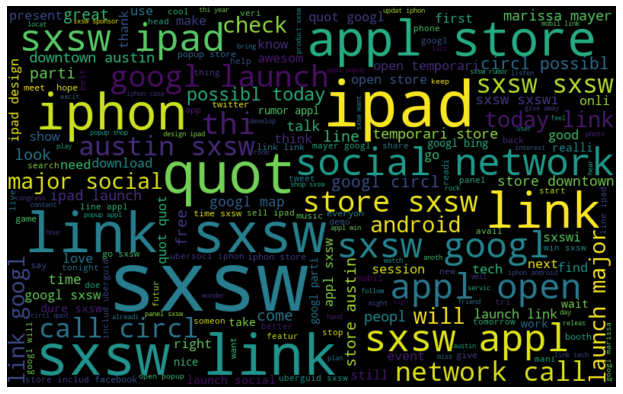

In [22]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### B) words in the tweets which are having "0" sentiment  

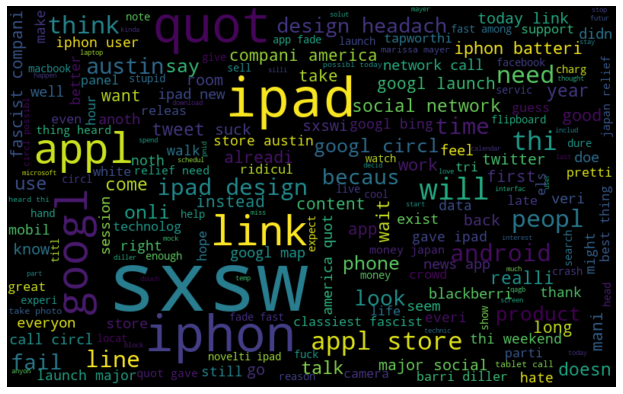

In [23]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### c) words in the tweets which are having "1" sentiment  

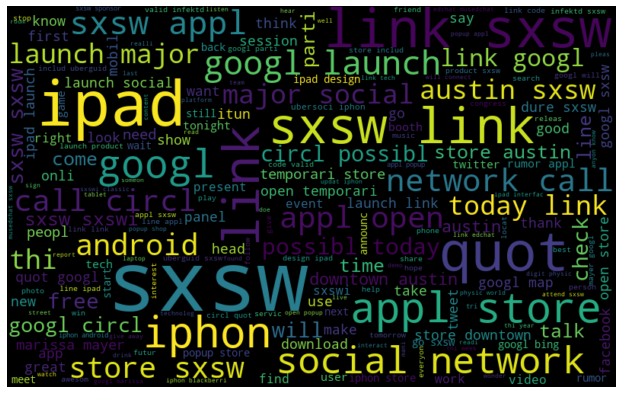

In [24]:
one_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(one_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### D) words in the tweets which are having "2" sentiment  


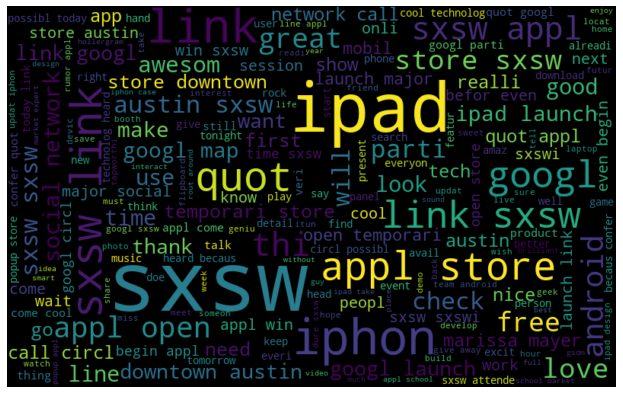

In [25]:
two_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(two_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### E) words in the tweets which are having "3" sentiment 

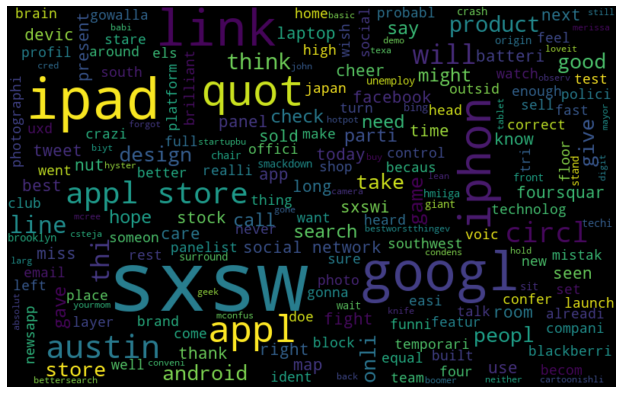

In [26]:
 
three_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(three_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [27]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from sentiments zero tweets

HT_sentiments_zero = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 0])
#HT_sentiments_zero

# extracting hashtags from sentiments one tweets

HT_sentiments_one = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 1])
#HT_sentiments_one

# extracting hashtags from sentiments two tweets

HT_sentiments_two = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 2])
#HT_sentiments_two


# extracting hashtags from sentiments three tweets

HT_sentiments_three = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 3])
#HT_sentiments_three

In [29]:
# unnesting list
HT_sentiments_zero = sum(HT_sentiments_zero,[])

HT_sentiments_zero

['sxsw',
 'fuckit',
 'illmakeitwork',
 'rise',
 'sxsw',
 'ipad',
 'sxsw',
 'psych',
 'sxsw',
 'twitterpow',
 'sxsw',
 'imthatgood',
 'sxsw',
 'netflixiphon',
 'ipad',
 'sxsw',
 'sxsw',
 'fail',
 'owllov',
 'sxsw',
 'enchant',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'qagb',
 'sxsw',
 'sxsw',
 'sxsw',
 'cnngrill',
 'sxsw',
 'sxsw',
 'csr',
 'sxsw',
 'mullenweg',
 'sxsw',
 'sxsw',
 'sxsw',
 'cnn',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'googl',
 'circl',
 'social',
 'sxsw',
 'sxsw',
 'sxsw',
 'osmpw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'fail',
 'googl',
 'sxsw',
 'pnid',
 'sxsw',
 'sxswi',
 'sxsw',
 'ipad',
 'sxsw',
 'tapworthi',
 'sxsw',
 'futuremf',
 'sxsw',
 'ogilvynot',
 'sxsw',
 'appl',
 'sxsw',
 'rji',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'socialfuel',
 'sxsw',
 'seenocreepi',
 'sxsw',
 'pnid',
 'sxsw',
 'sxsw',
 'sxsw',
 'web',
 'saatchini',
 'sxsw',
 'ipad',
 'app',
 'media',
 'sxsw',
 'sxsw',
 'tapwort

In [30]:
HT_sentiments_one = sum(HT_sentiments_one,[])
HT_sentiments_one

['sxswnui',
 'sxsw',
 'appl',
 'googledoodl',
 'sxsw',
 'sxsw',
 'technew',
 'tech',
 'appl',
 'ipad',
 'sxsw',
 'tablet',
 'tech',
 'sxsw',
 'ipad',
 'ubersoci',
 'iphon',
 'sxsw',
 'mashabl',
 'sxsw',
 'zazzlsxsw',
 'compani',
 'sxsw',
 'app',
 'featur',
 'hardwar',
 'ipad',
 'iphon',
 'sxsw',
 'calyp',
 'calyp',
 'sxsw',
 'appl',
 'ipad',
 'technolog',
 'itun',
 'sxsw',
 'sxsw',
 'doublelos',
 'sxsw',
 'sxsw',
 'circl',
 'sxsw',
 'circl',
 'sxsw',
 'sxsw',
 'sxsw',
 'startup',
 'movi',
 'awesom',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'deferomobil',
 'ipad',
 'sxsw',
 'sxsw',
 'appl',
 'ipad',
 'sxsw',
 'android',
 'iphon',
 'sm',
 'stevemartocci',
 'sxsw',
 'entri',
 'friend',
 'hous',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'recco',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'googlecircl',
 'googlem',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'googl',
 'circl',
 'sxsw',
 'bjdproduct',
 'appl',
 'sxsw',
 'tech',
 'sxs

In [31]:
HT_sentiments_two = sum(HT_sentiments_two,[])
HT_sentiments_two

['sxsw',
 'sxsw',
 'freemus',
 'sxsw',
 'sxsw',
 'elev',
 'sxsw',
 'techenvi',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'tech',
 'lightbox',
 'android',
 'sxsw',
 'technolog',
 'sxsw',
 'sxswi',
 'sxsw',
 'ipad',
 'sxsw',
 'lovemusicapi',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'tech',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxflip',
 'sxsw',
 'gsdm',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'usguy',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'seattl',
 'sxsw',
 'sxsw',
 'social',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'googl',
 'googl',
 'circl',
 'sxsw',
 'socbiz',
 'sxsw',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'augmentedr',
 'sxsw',
 'minimalistprogram',
 'marissagoogl',
 'sxsw',
 'sxsw',
 'sxsw',
 'fxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ip

In [32]:
HT_sentiments_three = sum(HT_sentiments_three,[])
HT_sentiments_three

['sxsw',
 'android',
 'iphon',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'bestworstthingev',
 'merissa',
 'mayor',
 'sxsw',
 'loveit',
 'sxsw',
 'startupbu',
 'sxsw',
 'sxsw',
 'newsapp',
 'sxsw',
 'ipad',
 'sxsw',
 'yourmom',
 'sxsw',
 'csteja',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'appl',
 'new',
 'sxswi',
 'bettersearch',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'austin',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'doyoureallyneedthat',
 'sxsw',
 'uxd',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'socialnetwork',
 'googl',
 'circl',
 'facebook',
 'sxsw',
 'busi',
 'sxsw',
 'disagre',
 'sxsw',
 'uxd',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'mobilesearch',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'googl',
 'coudbeeasi',
 'openbeta',
 'sxsw',
 'usguy',
 'dgtltribe',
 'sxswbuffalo',
 'sxsw',
 'netflixiphon',
 'arabspr',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'psfk',
 'sxsw',
 'mccan

Now that we have prepared our lists of hashtags for 0,1,2,3 sentiments, we can plot the top n hashtags.

 So, first let’s check the hashtags in the 0 sentiment tweets.

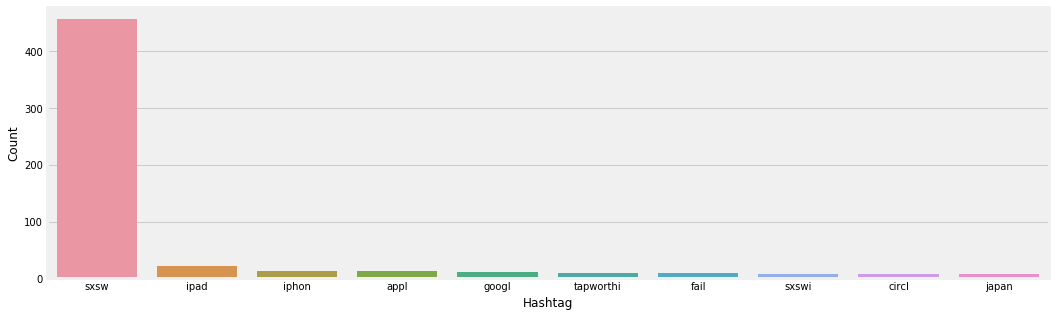

In [33]:
a = nltk.FreqDist(HT_sentiments_zero)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 1 sentiment tweets.

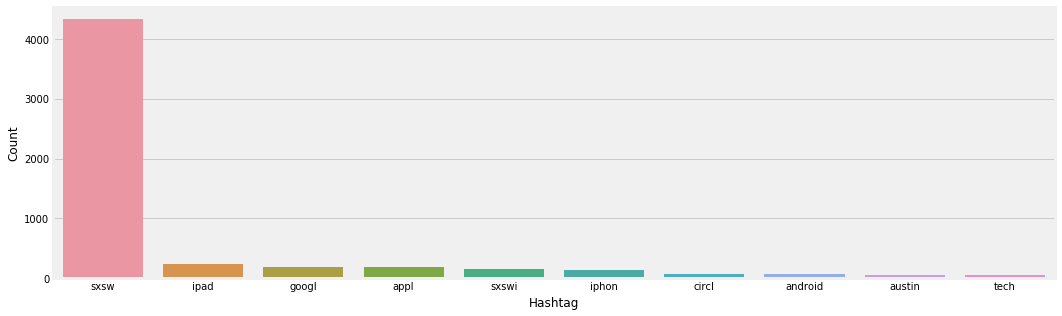

In [34]:
a = nltk.FreqDist(HT_sentiments_one)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 2 sentiment tweets.

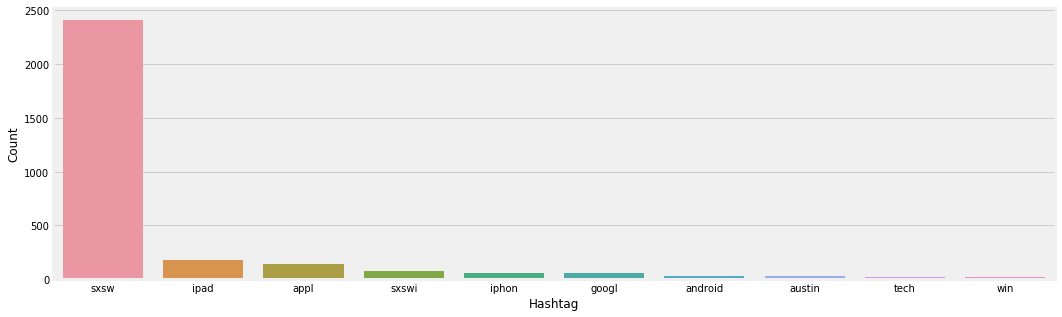

In [35]:
a = nltk.FreqDist(HT_sentiments_two)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 3 sentiment tweets.


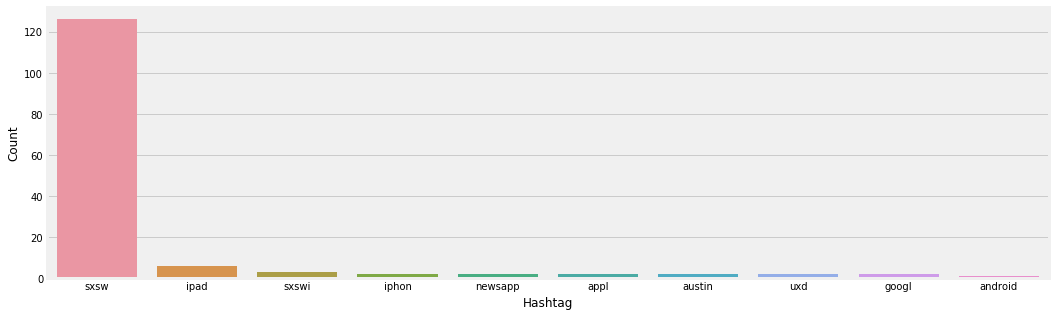

In [36]:
a = nltk.FreqDist(HT_sentiments_three)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
   
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# 4. Extracting Features from Cleaned Tweets

Bag-of-Words Features : Bag-of-Words is a method to represent text into numerical features

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(9093, 1000)

TF-IDF Features : This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9093, 1000)

### Word Embeddings

#### 1. Word2Vec Embeddings


In [39]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1372189, 1948800)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [40]:
model_w2v.wv.most_similar(positive="googl")

[('#sloanxsw', 0.5809794664382935),
 ('increas', 0.5679416656494141),
 ('incorrect', 0.5653054714202881),
 ('rec', 0.5608339905738831),
 ('marisa', 0.5462932586669922),
 ('splendor', 0.5452415347099304),
 ('dancin', 0.5388383865356445),
 ('sapet', 0.5384754538536072),
 ('intrigu', 0.5327214002609253),
 ('oooh', 0.5313106775283813)]

In [41]:
model_w2v.wv.most_similar(positive="trump")

[('densiti', 0.9631742238998413),
 ('clariti', 0.9578608274459839),
 ('quantiti', 0.9460102915763855),
 ('qualiti', 0.8901627659797668),
 ('element', 0.8855754733085632),
 ('chunki', 0.8602340221405029),
 ('matthew', 0.8252319097518921),
 ('davi', 0.8158249855041504),
 ('carlson', 0.8034961819648743),
 ('pan', 0.7738319635391235)]

In [42]:
model_w2v['googl']

array([-0.01889532,  0.02781402, -0.5339892 ,  0.21286742,  0.13113658,
        0.07464098, -0.17954029,  0.35364628,  0.13236392, -0.05931922,
        0.17915455, -0.30080053, -0.3650145 ,  0.31393683,  0.2520839 ,
        0.33413413,  0.24095193,  0.10668381,  0.30560324,  0.18595277,
        0.12929456,  0.16785406, -0.19463399,  0.15095271,  0.18446933,
       -0.16682823, -0.46368542,  0.19299717, -0.07688098, -0.32777748,
       -0.09199686, -0.37452856,  0.2128076 ,  0.03456219, -0.20691037,
       -0.23883605,  0.25706214, -0.32779297,  0.48279274,  0.10474881,
        0.00487576,  0.14521973, -0.07454566, -0.4695286 ,  0.00671247,
       -0.06958184, -0.2599162 , -0.20727175,  0.06067985,  0.24804716,
       -0.23848945, -0.2541896 , -0.40164343, -0.03077106, -0.21349393,
        0.33566967, -0.22215818,  0.47055575,  0.04280934, -0.3730785 ,
        0.38880038,  0.32806143,  0.08042316,  0.32080567,  0.08251736,
       -0.01030969, -0.15949215, -0.08196483, -0.22514793, -0.37

In [43]:
len(model_w2v['googl']) #The length of the vector is 200

200

__Preparing Vectors for Tweets__

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [44]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set...

In [45]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape  

(9093, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features. 

#### 2. Doc2Vec Embedding

Let's load the required libraries.

In [46]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\rkkir\Anaconda3\lib\site-packages\tqdm\std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function

In [47]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [48]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

Let's have a look at the result.

In [49]:
labeled_tweets[:6]

[LabeledSentence(words=['#sxswnui', '#sxsw', '#appl', 'defin', 'languag', 'touch', 'with', 'differ', 'dialect', 'becom', 'smaller'], tags=['tweet_0']),
 LabeledSentence(words=['learn', 'googl', 'doodl', 'doodl', 'should', 'light', 'funni', 'innov', 'with', 'except', 'signific', 'occas', '#googledoodl', '#sxsw'], tags=['tweet_1']),
 LabeledSentence(words=['most', 'your', 'face', 'steal', 'show', 'quot', '#sxsw', 'appl', 'school', 'expert', 'quot', 'link'], tags=['tweet_2']),
 LabeledSentence(words=['thi', 'iphon', '#sxsw', 'would', 'pretti', 'awesom', 'didn', 'crash', 'everi', 'min', 'dure', 'extend', 'brows', '#fuckit', '#illmakeitwork'], tags=['tweet_3']),
 LabeledSentence(words=['line', 'outsid', 'appl', 'store', 'austin', 'wait', 'ipad', '#sxsw', 'link'], tags=['tweet_4']),
 LabeledSentence(words=['#technew', 'lone', 'dude', 'await', 'ipad', 'appl', 'sxsw', 'store', 'link', '#tech', 'new', '#appl', '#ipad', '#sxsw', '#tablet', '#tech'], tags=['tweet_5'])]

Now let's train a __doc2vec__ model.

In [50]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\rkkir\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████████████████████████████████████████████████████████████████████| 9093/9093 [00:00<00:00, 538068.12it/s]


In [51]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

__Preparing doc2vec Feature Set__

In [52]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9093, 200)

# 5. Model Building: Sentiment Analysis

# Model Building
We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1.Logistic Regression
2.Support Vector Machine
3.RandomForest
4.XGBoost



# 1. Logistic Regression

A) Building model using Bag-of-Words features

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7274,:]
test_bow = bow[7274:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

log_bow=f1_score(yvalid, prediction,average="weighted") # calculating f1 score
log_bow

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6246280110816341

We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.64 for the validation set. Now we will use this model to predict for the test data.

In [54]:
test_pred = lreg.predict(test_bow)
#test_pred_int = test_pred[:,1] >= 0.3
#test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

Public Leaderboard F1 Score: 0.64

B) Building model using TF-IDF features

In [55]:
train_tfidf = tfidf[:7274,:]
test_tfidf = tfidf[7274:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)

log_tfidf=f1_score(yvalid, prediction,average="weighted")
log_tfidf

0.6070570094334956

In [56]:
test_pred = lreg.predict(test_tfidf)
#test_pred_int = test_pred[:,1] >= 0.3
#test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

Public Leaderboard F1 Score: 0.64

C) Word2Vec Features

In [57]:
train_w2v = wordvec_df.iloc[:7274,:]
test_w2v = wordvec_df.iloc[7274:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [58]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict(xvalid_w2v)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction,average='weighted')

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5859648189909625

Public Leaderboard F1 Score: 0.624

D) Doc2Vec Features

In [59]:
train_d2v = docvec_df.iloc[:7274,:]
test_d2v = docvec_df.iloc[7274:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [60]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict(xvalid_d2v)

f1_score(yvalid, prediction,average='weighted')

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5555364649505848

Public Leaderboard F1 Score: 0.62

# 2. Support Vector Machine

In [61]:
from sklearn import svm

#### Bag-of-Words Features



In [62]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict(xvalid_bow)

svm_bow=f1_score(yvalid, prediction,average='weighted')
svm_bow

0.6265542136239555

Again let's make predictions for the test dataset and create another submission file.

In [63]:
test_pred = svc.predict(test_bow)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_svc_bow.csv', index=False)

Public Leaderboard F1 Score: 0.64

#### TF-IDF Features

In [64]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict(xvalid_tfidf)

svm_tfidf=f1_score(yvalid, prediction,average='weighted')
svm_tfidf

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6269323011169035

Public Leaderboard F1 Score: 0.66

#### Word2Vec Features

In [65]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict(xvalid_w2v)

f1_score(yvalid, prediction,average='weighted')

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5829406817956668

Public Leaderboard F1 Score: 0.626

#### Doc2Vec Features

In [66]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict(xvalid_d2v)

f1_score(yvalid, prediction,average='weighted')

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5236667887820391

Public Leaderboard F1 Score: 0.6234

# 3. RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

#### Bag-of-Words Features

In [68]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
rf_bow=f1_score(yvalid, prediction,average='weighted')

Let's make predictions for the test dataset and create another submission file.

In [69]:
test_pred = rf.predict(test_bow)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_rf_bow.csv', index=False)

#### TF-IDF Features

In [70]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
rf_tfidf=f1_score(yvalid, prediction,average='weighted')
rf_tfidf

0.6421340191859274

In [71]:
test_pred = rf.predict(test_tfidf)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_rf_tfdif.csv', index=False)

Public Leaderboard F1 Score: 0.67

#### Word2Vec Features

In [72]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction,average='weighted')

0.6156123982097028

Public Leaderboard F1 Score: 0.61

#### Doc2Vec Features

In [73]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction,average='weighted')

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5550527254057188

Public Leaderboard F1 Score: 0.618

# 4. XGBoost

In [74]:
import xgboost
from xgboost import XGBClassifier

Bag-of-Words Features

In [75]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
Xg_Boost_bow=f1_score(yvalid, prediction,average='weighted')
Xg_Boost_bow

0.6475151938035839

In [76]:
test_pred = xgb_model.predict(test_bow)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_xgb_bow.csv', index=False)

Public Leaderboard F1 Score:0.66

TF-IDF Features

In [77]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
Xg_tfidf=f1_score(yvalid, prediction,average='weighted')
Xg_tfidf

0.645367693643506

Public Leaderboard F1 Score: 0.66

Word2Vec Features

In [78]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction,average='weighted')

0.6330830267287364

Public Leaderboard F1 Score: 0.66 

XGBoost model on word2vec features has outperformed all the previuos models in this course.

Doc2Vec Features

In [79]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction,average='weighted')

0.5976904123079679

Public Leaderboard F1 Score: 0.62

# ## Model Finetuning

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [80]:
import xgboost as xgb

In [81]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

C:\Users\rkkir\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [82]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

We will prepare a custom evaluation metric to calculate F1 score.

In [83]:
def custom_eval(preds, dtrain):
    Sentiment = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(Sentiment, preds))]

General Approach for Parameter Tuning

We will follow the steps below to tune the parameters.

1.Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

2.Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

3.Tune the learning rate.

4.Finally tune gamma to avoid overfitting.


Tuning max_depth and min_child_weight

In [84]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [85]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5


XGBoostError: [09:45:55] src/objective/regression_obj.cu:101: label must be in [0,1] for logistic regression

In [86]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','SVM (Bag-of-Words)','Random Forest(Bag-of-Words)','Xg Boost (Bag-of-Words)']

score_1 = [log_bow,svm_bow,rf_bow,Xg_Boost_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,5)])

compare_1.T

,1,2,3,4
Model,LogisticRegression(Bag-of-Words),SVM (Bag-of-Words),Random Forest(Bag-of-Words),Xg Boost (Bag-of-Words)
F1_Score,0.624628,0.626554,0.638981,0.647515


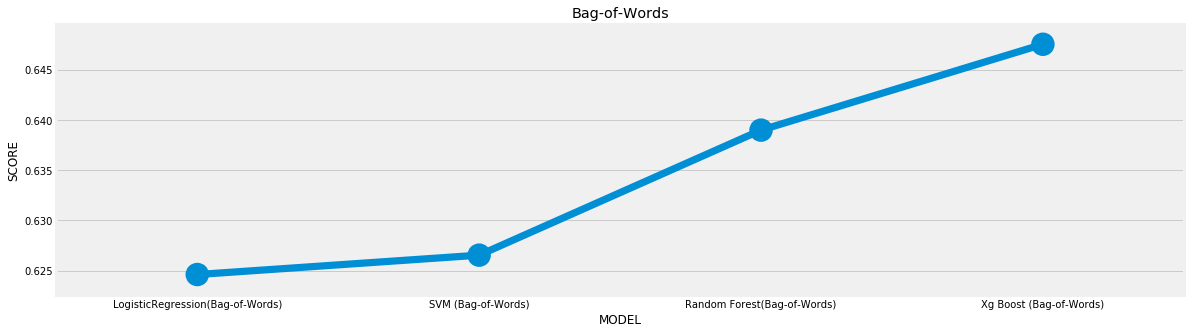

In [87]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [88]:
Algo_2 = ['LogisticRegression(tfidf)','SVM (tfidf)','Random Forest(tfidf)','Xg Boost (tfidf)']

score_2 = [log_tfidf,svm_tfidf,rf_tfidf,Xg_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,5)])

compare_2.T

,1,2,3,4
Model,LogisticRegression(tfidf),SVM (tfidf),Random Forest(tfidf),Xg Boost (tfidf)
F1_Score,0.607057,0.626932,0.642134,0.645368


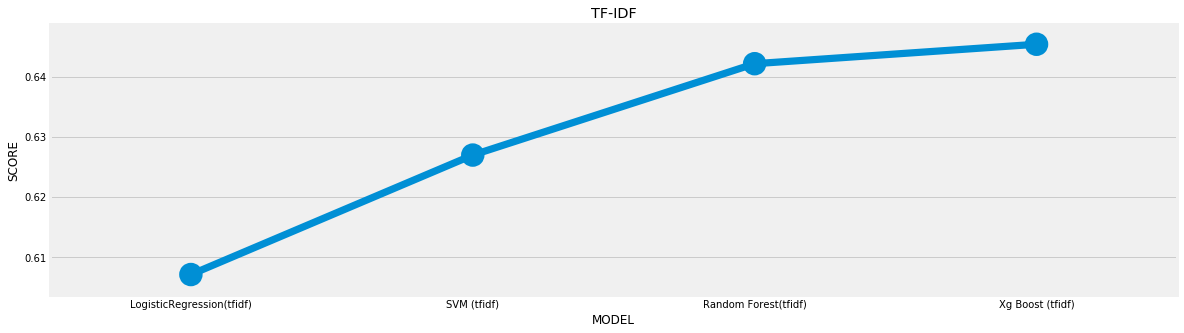

In [89]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [90]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.624628,0.607057


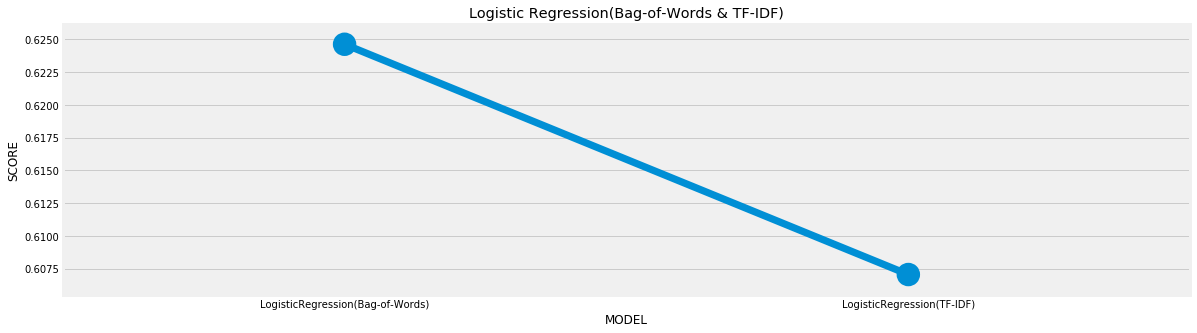

In [91]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [92]:
Algo_best = ['Xg Boost (Bag-of-Words)','Xg Boost (TF-IDF)']

score_best = [Xg_Boost_bow,Xg_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,Xg Boost (Bag-of-Words),Xg Boost (TF-IDF)
F1_Score,0.647515,0.645368


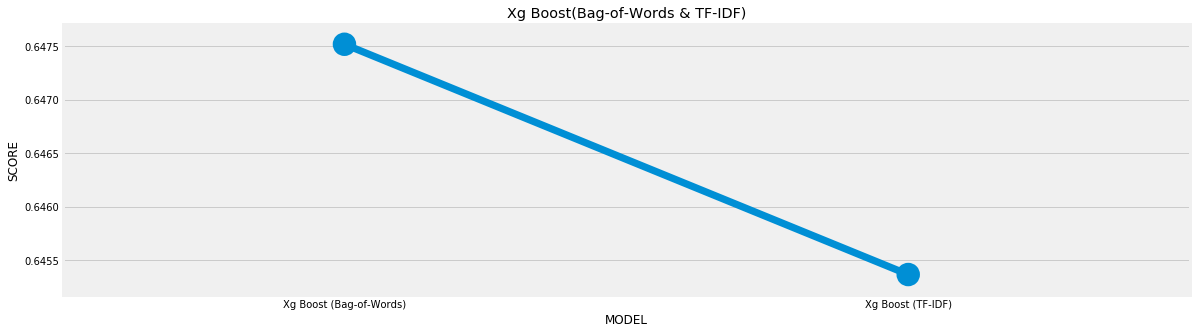

In [93]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Xg Boost(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [94]:
Algo_best = ['Xg Boost (Bag-of-Words)','Xg Boost (TF-IDF)']

score_best = [Xg_Boost_bow,Xg_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T




,1,2
Model,Xg Boost (Bag-of-Words),Xg Boost (TF-IDF)
F1_Score,0.647515,0.645368


In [95]:
sub=pd.read_csv("sub_xgb_bow.csv")

In [96]:
sub

,tweet_id,sentiment
0,7506,1
1,7992,2
2,247,2
3,7688,2
4,3294,1
...,...,...
1814,1550,2
1815,1933,1
1816,9052,1
1817,4219,0


In [97]:
sub.sentiment.value_counts()

1    1307
2     440
0      62
3      10
Name: sentiment, dtype: int64